In [6]:
import os
import keras
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib notebook

In [84]:
########################
##    Reading data    ##
########################

process_0 = np.load('vecs/process_0.npy')
process_1 = np.load('vecs/process_1.npy')
process_2 = np.load('vecs/process_2.npy')
process_3 = np.load('vecs/process_3.npy')

data = {**process_0, 
        **process_1, 
        **process_2, 
        **process_3}

print('data :', len(data))

data : 53


# Poisson Regression Model
<br>
Poisson Regression model is a statistical model that is used for climate data.
The only thing we should take into consideration is it only accepts 1-element input so we just can't give it all the events' info and try to predict info about all of them for example. What we should do instead is to make a seperate model for each event type (and this for only 1 state, we should do so for all states...) but it isn't a problem as the model itself is very light.
<br> <br>
So for demonstrative purposes only I'll make a model for some state and for some event only and show the results. We will do for others as well if needed.
<br> <br>

In [111]:
#####################################
##    Selecting some event type    ##
#####################################

event_data = data['Hurricane']

train_data = event_data[:4*event_data.shape[0]//5]
test_data = event_data[4*event_data.shape[0]//5:]

train_data = [train_data[:-1], np.roll(train_data, -1)[:-1]]
test_data = [test_data[:-1], np.roll(test_data, -1)[:-1]]

print('train_data  : [{}, {}]'.format(train_data[0].shape, train_data[1].shape))
print('test_data   : [{}, {}]'.format(test_data[0].shape, test_data[1].shape))

train_data  : [(3259,), (3259,)]
test_data   : [(814,), (814,)]


In [112]:
#################
##    Model    ##
#################

poisson_mod = sm.Poisson(train_data[1], train_data[0])
poisson_res = poisson_mod.fit(method="newton")
poisson_res.summary()

Optimization terminated successfully.
         Current function value: 1.009672
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 3259
Model:                        Poisson   Df Residuals:                     3258
Method:                           MLE   Df Model:                            0
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                  -6.803
Time:                        21:16:10   Log-Likelihood:                -3290.5
converged:                       True   LL-Null:                       -421.69
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1259      0.051      2.459      0.014       0.026       0.226
==============================================================================
"""

<IPython.core.display.Javascript object>


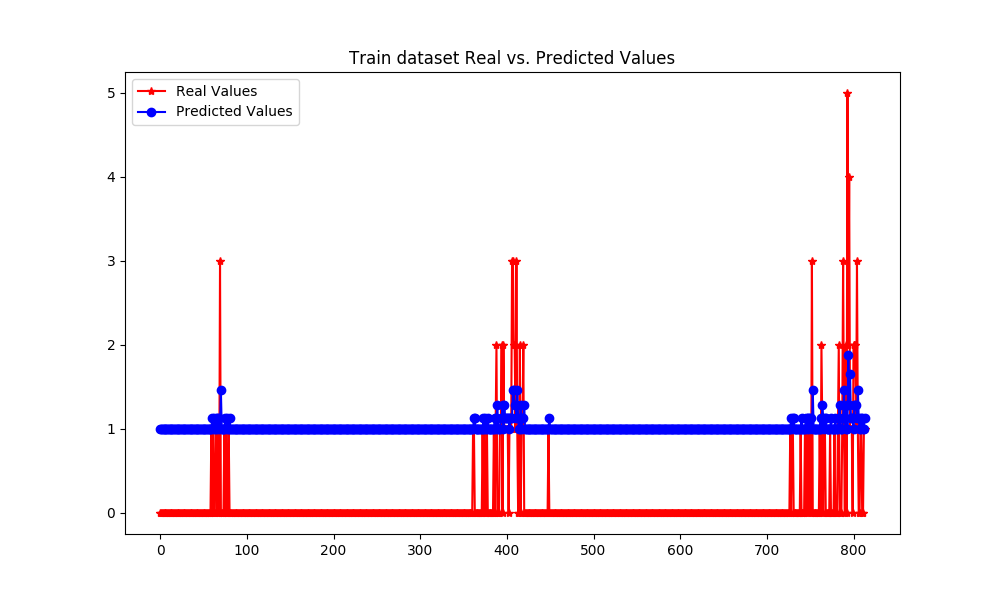

In [114]:
#############################
##    Testing the model    ##
#############################

predVals = poisson_res.predict(test_data[0])

plt.figure(figsize=(10, 6))
plt.plot(range(test_data[1].shape[0]), test_data[1], 'r*-', 
         range(predVals.shape[0]), predVals, 'bo-')
plt.title('Train dataset Real vs. Predicted Values')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()